# Data Import and Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
app = pd.read_csv(r"D:\Notebooks\run only EDA\Data_Science-main\Data\application_data.csv")
prev_app = pd.read_csv(r"D:\Notebooks\run only EDA\Data_Science-main\Data\previous_application.csv")


In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape

(307511, 122)

In [6]:
app.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [7]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [8]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100
msng_info

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...,...
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
118,NONLIVINGAPARTMENTS_MODE,213514,69.432963
119,COMMONAREA_MODE,214865,69.872297
120,COMMONAREA_AVG,214865,69.872297


In [9]:
msng_info.to_excel(r'D:\Notebooks\run only EDA\Data_Science-main\Data\missing_info.xlsx',index=False)
msng_info.head()


,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [10]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
app_msng_rmvd = app.drop(labels=msng_col,axis=1)
app_msng_rmvd.shape

(307511, 73)

In [11]:
app_msng_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
flag_col = []

for col in app_msng_rmvd.columns:
    if col.startswith("FLAG_"):
        flag_col.append(col)
        
len(flag_col)

28

In [13]:
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [14]:
flag_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


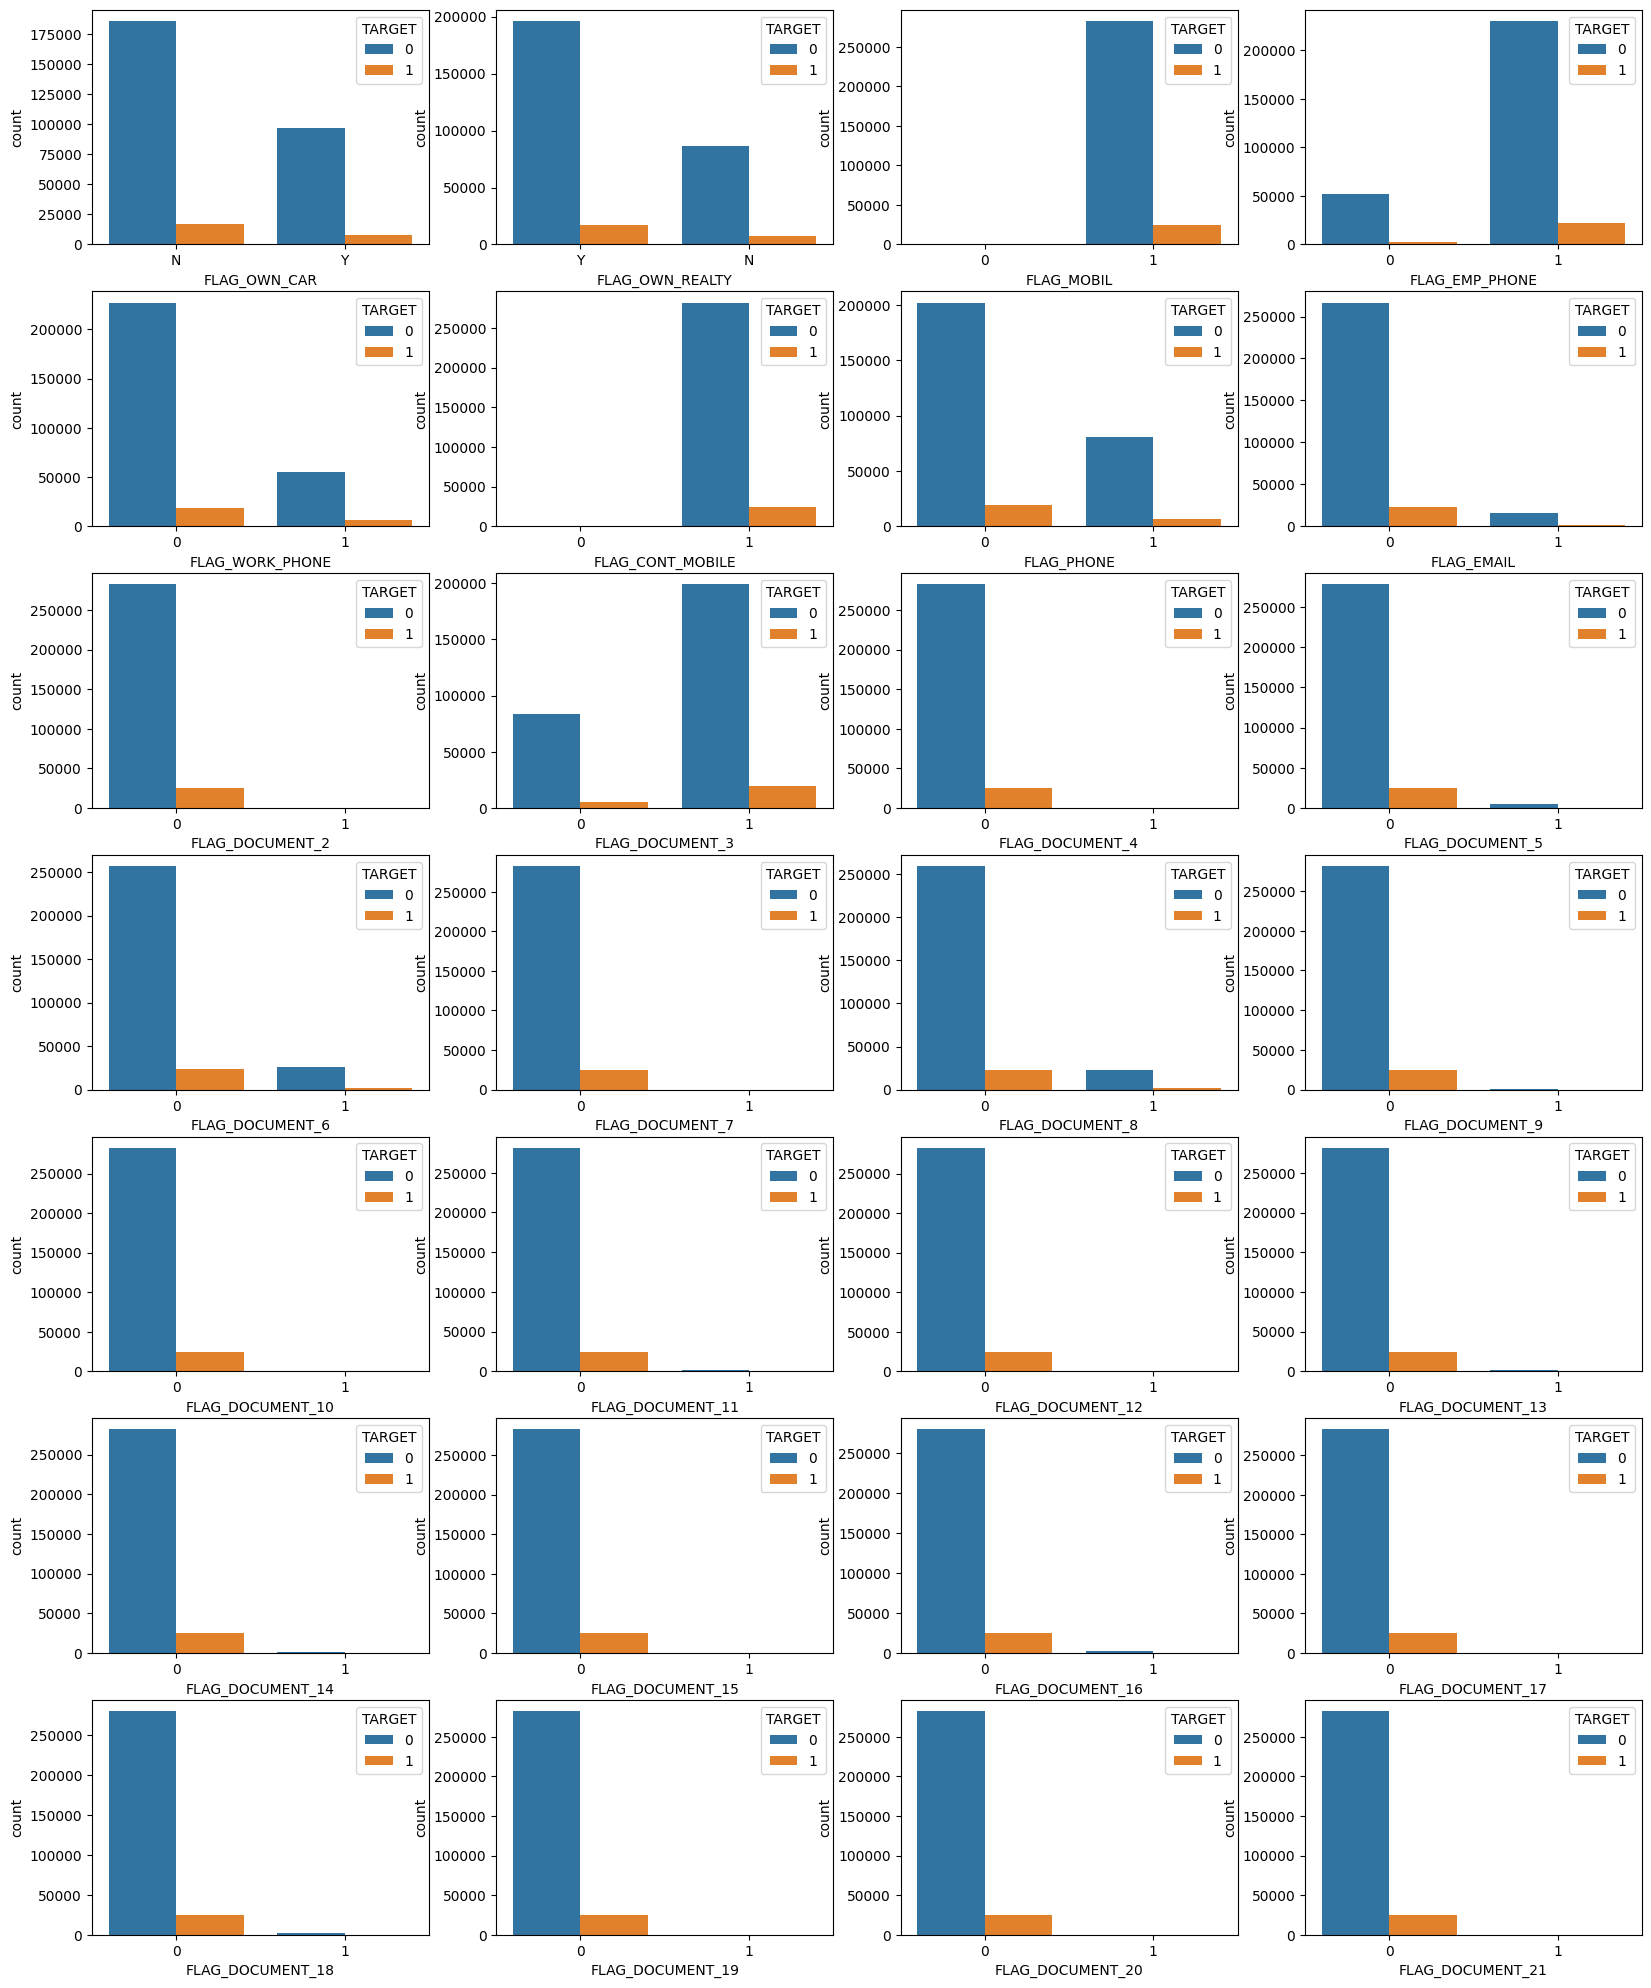

In [15]:
plt.figure(figsize=(20,25))

for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')

In [16]:
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
     'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[flg_corr]

In [17]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [18]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

<Axes: >

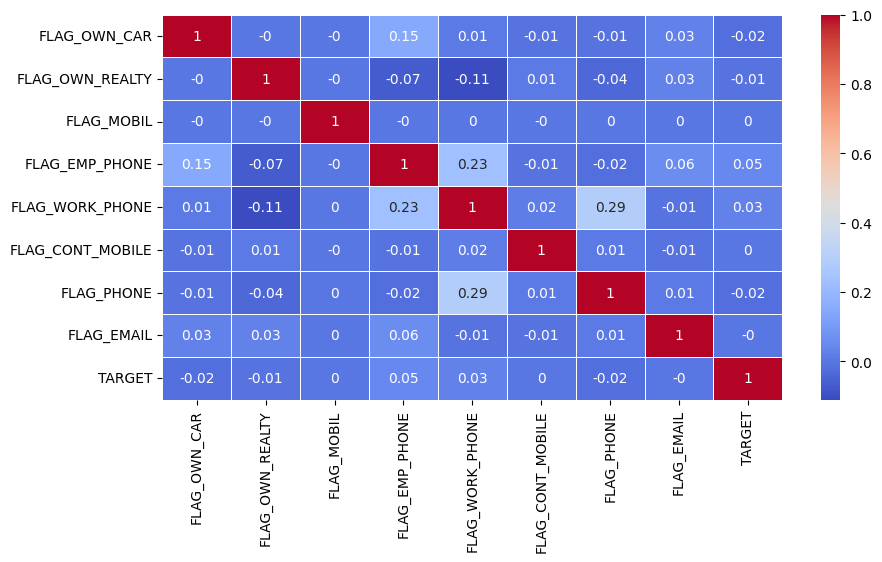

In [19]:
corr_df = round(flag_corr_df.corr(),2)

plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=.5,annot=True)

In [20]:
app_flag_rmvd = app_msng_rmvd.drop(labels =flag_col,axis=1)
app_flag_rmvd.shape


(307511, 45)

<Axes: >

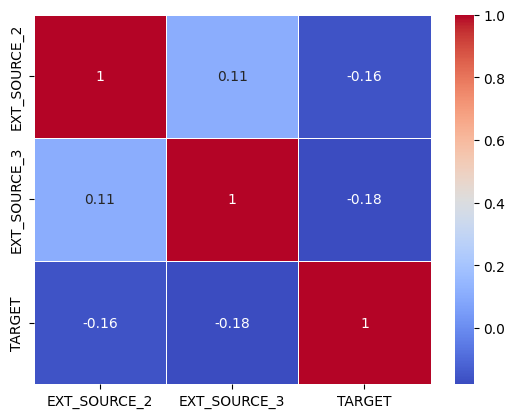

In [21]:
sns.heatmap(data=round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

In [22]:
app_score_col_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_score_col_rmvd.shape

(307511, 43)

In [23]:
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [24]:
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0]))

In [25]:
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna((app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]))

In [26]:
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [27]:
app_score_col_rmvd['NAME_TYPE_SUITE'] = app_score_col_rmvd['NAME_TYPE_SUITE'].fillna((app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0]))

In [28]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [29]:
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna((app_score_col_rmvd['AMT_ANNUITY'].mean()))

In [30]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [31]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR']

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64

In [32]:
amt_req_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [33]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [34]:
for col in amt_req_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna((app_score_col_rmvd[col].median()))

In [35]:
app_score_col_rmvd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [36]:
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE'].median()))


In [37]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [38]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


# ### Value modifiction

In [39]:
days_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [40]:
for col in days_col:
    app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

In [41]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
app_score_col_rmvd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [43]:
app_score_col_rmvd['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

# Outlier detection & treatment

In [44]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

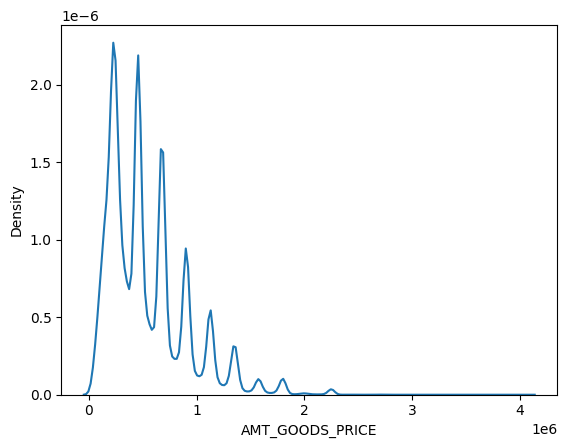

In [45]:
sns.kdeplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

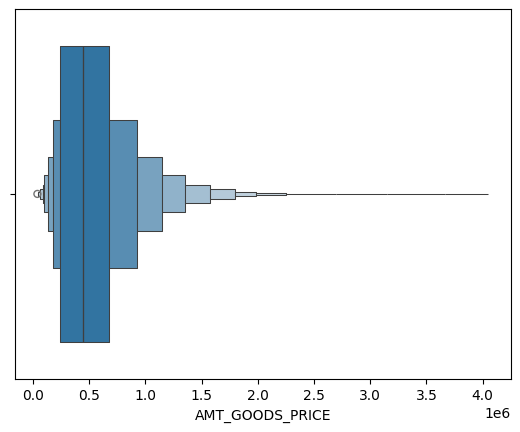

In [46]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

In [47]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [48]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)


In [49]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()


AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [50]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [52]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [53]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [54]:
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [55]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [56]:

app_score_col_rmvd['AMT_CREDIT'].max()

4050000.0

In [57]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [58]:
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [59]:
app_score_col_rmvd['AMT_CREDIT'].isnull().sum()

0

In [60]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [61]:
app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [62]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)


In [63]:
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [64]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [65]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [66]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [67]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [68]:
app_score_col_rmvd['DAYS_EMPLOYED'].max()

365243

In [69]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)


In [70]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [71]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])


0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [72]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7489

In [73]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [74]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

In [75]:
app_score_col_rmvd['DAYS_BIRTH'].isnull().sum()

0

# Data Analysis 

In [76]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [77]:
obj_var = app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [78]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

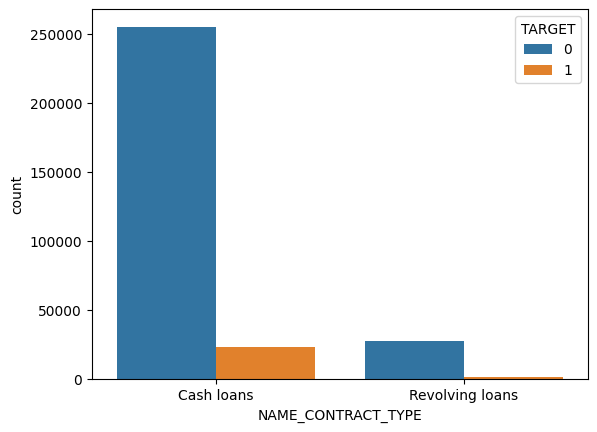

In [79]:
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [80]:
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)

In [81]:
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [82]:
data_pct['PCT'] = data_pct['TARGET']*100

In [83]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

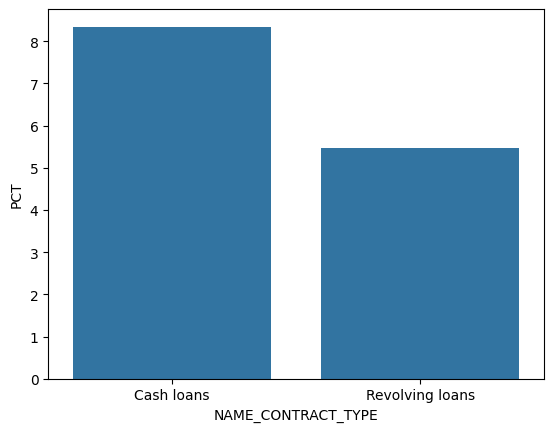

In [84]:

sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

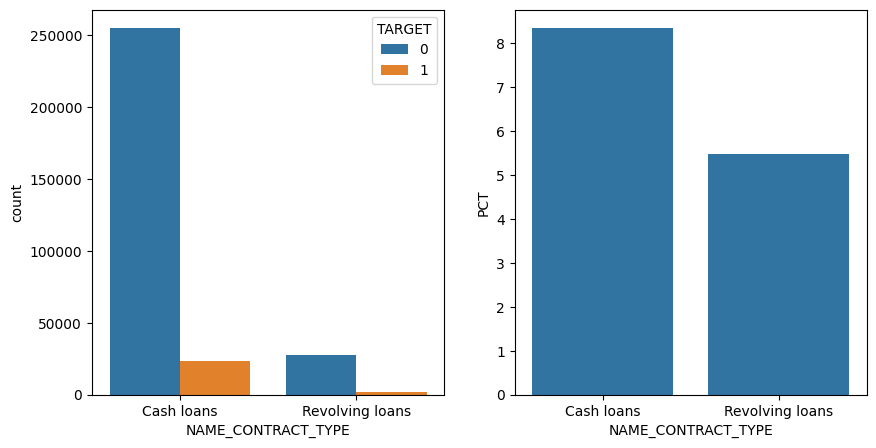

In [85]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

In [86]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

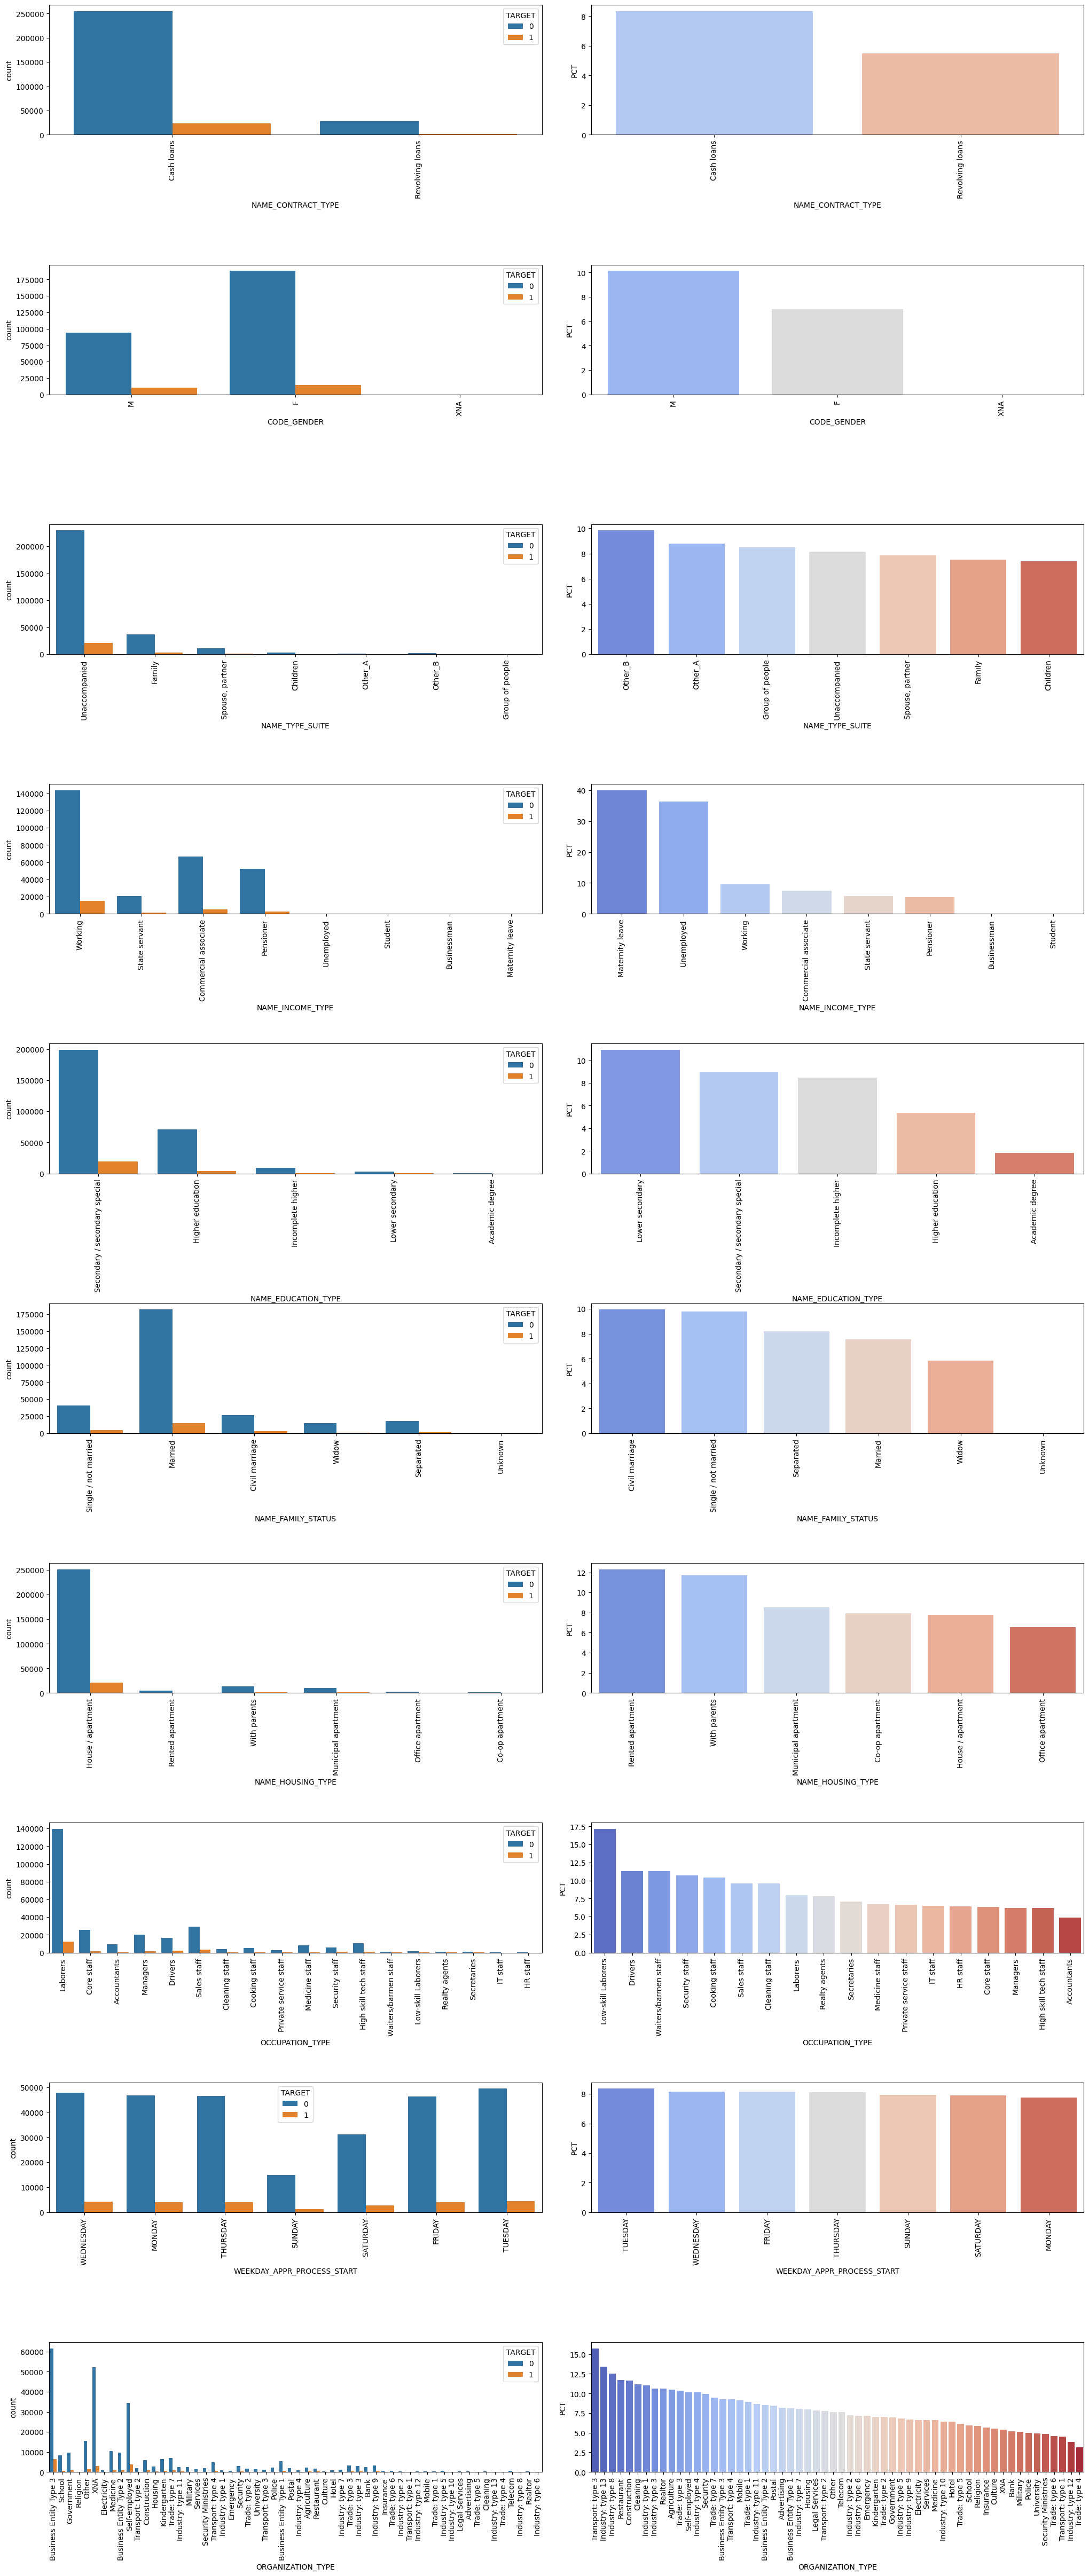

In [87]:
plt.figure(figsize=(25,60))


for i, var in enumerate(obj_var):

    data_pct = app_score_col_rmvd[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_score_col_rmvd,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)


In [88]:
app_score_col_rmvd['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [89]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [90]:
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [91]:
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,...,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [92]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [93]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
defaulter_corr = defaulters.corr()

# Extract upper triangle part of the correlation matrix
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0': 'var1',
                                                                                                                                    'level_1': 'var2',
                                                                                                                                    0: 'corr'})

# Take absolute values of correlations
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])

# Drop rows with NaN values in the 'corr' column
defaulter_corr_unstck = defaulter_corr_unstck.dropna(subset=['corr'])

# Sort by absolute correlation coefficient in descending order and get the top 10
top_10_correlations = defaulter_corr_unstck.sort_values(by=['corr'], ascending=False).head(10)

# Print or do further analysis with top_10_correlations
print(top_10_correlations)


                            var1                        var2      corr
814     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE  0.998269
202              AMT_GOODS_PRICE                  AMT_CREDIT  0.982783
475  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.956637
398              CNT_FAM_MEMBERS                CNT_CHILDREN  0.885484
848     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.868994
611  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.847885
713      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.778540
203              AMT_GOODS_PRICE                 AMT_ANNUITY  0.752295
169                  AMT_ANNUITY                  AMT_CREDIT  0.752195
305                DAYS_EMPLOYED                  DAYS_BIRTH  0.582185


In [94]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
202,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
169,AMT_ANNUITY,AMT_CREDIT,0.771297
305,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


In [95]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

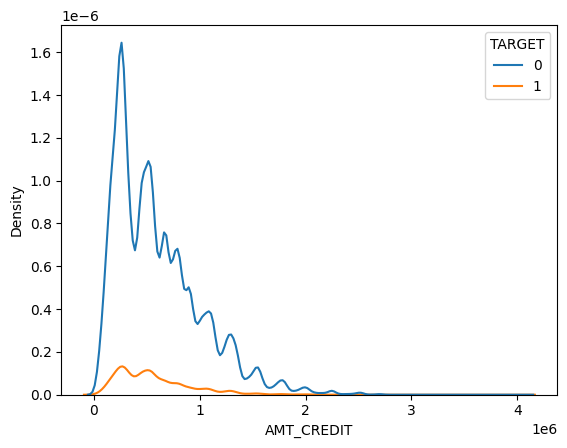

In [97]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

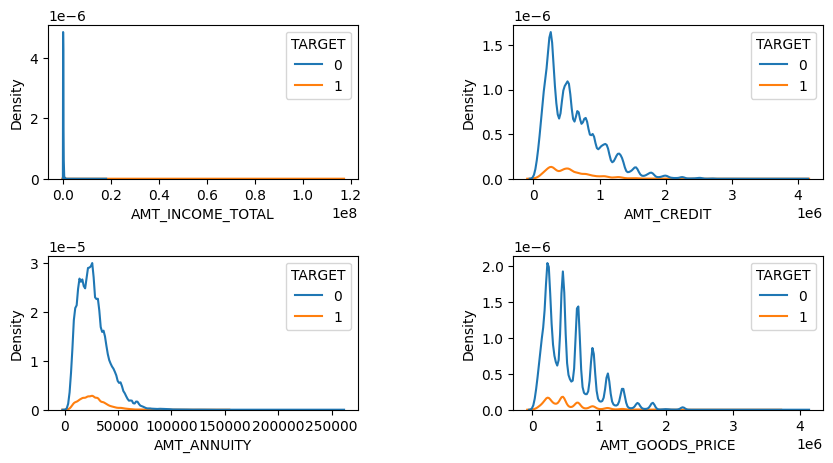

In [98]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [99]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

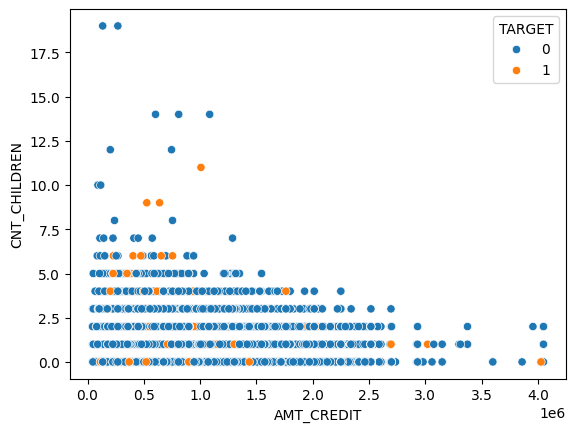

In [100]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [101]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]


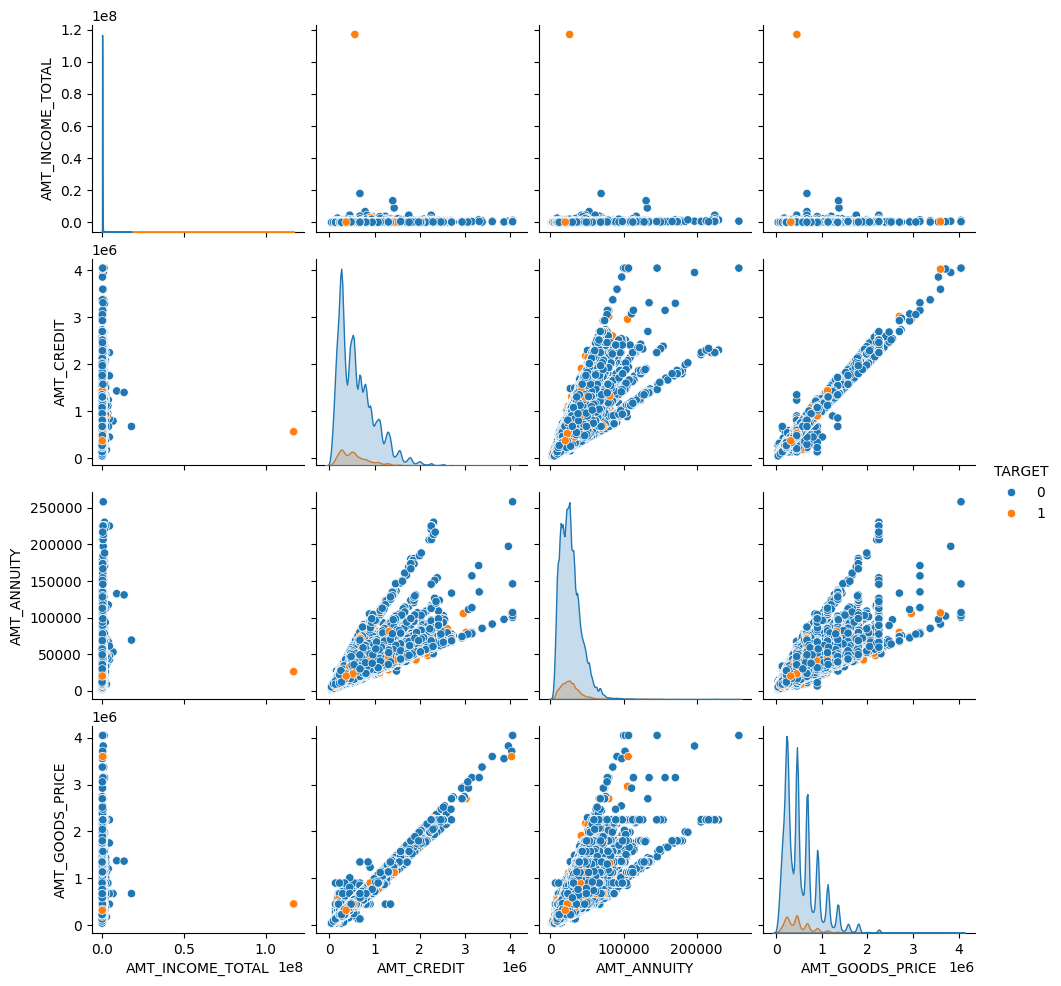

In [102]:
sns.pairplot(data=amt_var,hue='TARGET')

In [103]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40


['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [104]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [105]:
len(prev_app.columns)

37

In [106]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)


len(prev_app_nva_col_rmvd.columns)


22

In [107]:
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [108]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [109]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [110]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [111]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [112]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())


In [113]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])


In [114]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']



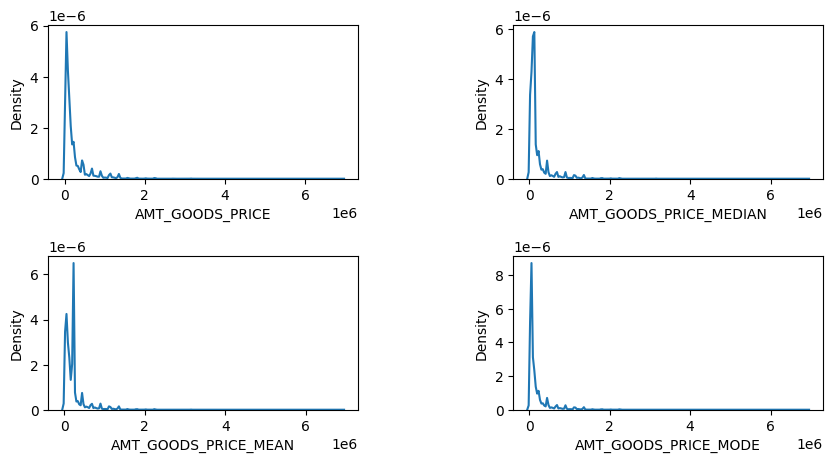

In [115]:
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)


In [116]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [117]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [118]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])


mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [119]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())



In [120]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [121]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [122]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [123]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)


In [124]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)


AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [125]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [126]:

prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [127]:
len(prev_app_nva_col_rmvd.columns)

22

In [128]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [129]:
merged_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


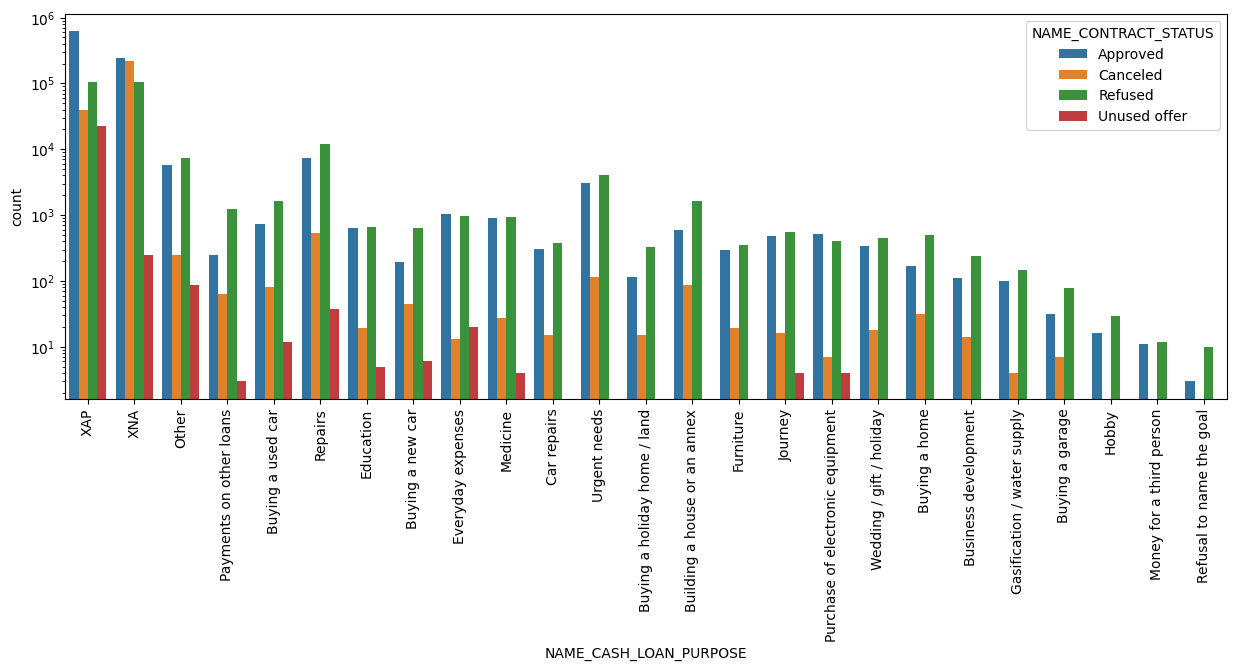

In [130]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

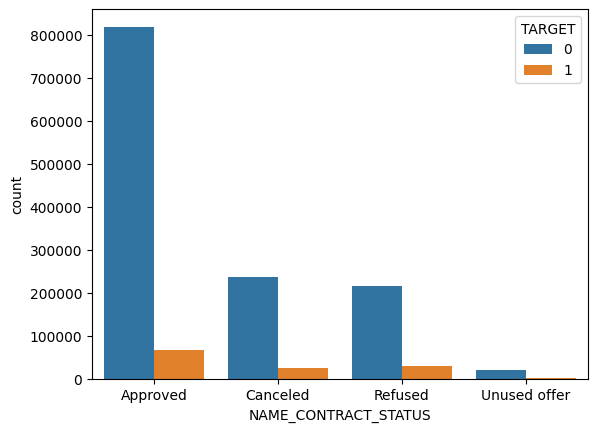

In [131]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')


In [132]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

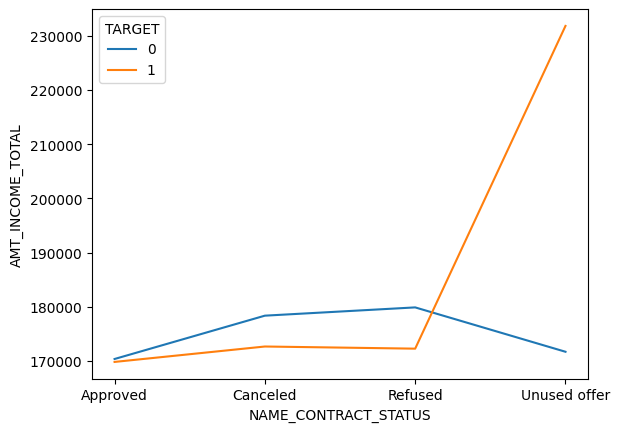

In [133]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


In [134]:

len(merged_df.columns)

70

In [135]:
# # All the analysis

# most of the customers have taken cash loan
# customers who have taken cash loans are less likely to default
# 
# CODE_GENDER - 
# 
#     most of the loans have been taken by female
#     default rate for females are just ~7% which is safer and lesser than male
# 
# NAME_TYPE_SUITE - 
# 
#     unacompanied people had tanke most of the loans and the default rate is ~8.5% which is still okay
# 
# NAME_INCOME_TYPE - 
# 
#     the safest segments are working, commercial associates and pensioners
# 
# NAME_EDUCATION_TYPE - 
# 
#     Higher education is the safest segment to give the loan with a default rate of less than 5%
# 
# NAME_FAMILY_STATUS - 
# 
#     Married people are safe to target, default rate is 8%
# 
# 
# NAME_HOUSING_TYPE - 
# 
#     People having house/appartment are safe to give the loan with default rate of ~8%
# 
# OCCUPATION_TYPE - 
# 
#     Low-Skill Laboreres and drivers are highest defaulters
#     Accountants are less defaulters
#     Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%
# 
# ORGANIZATION_TYPE - 
# 
#     Transport type 3 highest defaulter
#     Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %
# 
# =======univariate numeric variables analysis========
# 
#     >> most of the loans were given for the goods price ranging between 0 to 1 ml
#     >> most of the loans were given for the credit amount of 0 to 1 ml
#     >> most of the customers are paying annuity of 0 to 50 K
#     >> mostly the customers have income between 0 to 1 ml
# 
# =============bivariate analysis==================
# 
#     >> AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
#     >> people having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, coudl turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million
#     >> people having children 1 to less than 5 are safer to give the loan
#     >> People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment)
# 
# ============analysis on merged data==============
# 
#     >> for the repairing purpose customers had applied mostly prev. and the same puspose has most number of cancelations
#     >> most of the app. which were prev. either canceled or refused 80-90% of them are repayer in the current data
#     >> offers which were unused prev. now have maximum number of defaulters despite of having high income band customers

# # Final Conclusion/Insights

# Bank should target the customers
# 
#     >> having low income i.e. below 1 ml
#     >> working in Others, Business Entity Type 3, Self Employed  org. type
#     >> working as Accountants, Core staff, Managers and Laborers 
#     >> having house/appartment and are married and having children not more than 5
#     >> Highly educated
#     >> preferably female
# 
#     >> unacompanied people can be safer -  default rate is ~8.5%
# 
# Amount segment recommended -
# 
#     >> the credit amount should not be more than 1 ml
#     >> annuity can be made of 50K (depending on the eligibility)
#     >> income bracket could be below 1 ml
# 
#     >> 80-90% of the customer who were prev. canceled/refused, are repayers. Bank can do the analysis and can consider to give loan to these segments
# 
# 
# ====================precautions===============
# 
#     >> org. Transport type 3 should be avoided
#     >> Low-Skill Laboreres and drivers  should be avoided
#     >> offers prev. unused and high income customer should be avoided
# 
